# Chicago_Crime_Detective Project

### Step 1: Download the data from the source

Need to add

### Step 2: Importing Lybraries

In [1]:
# Importing required libraries
from math import *
import pandas as pd
import numpy as np
import datetime
import dateutil
import matplotlib.pyplot as plt

### Step 3: Load the data into data frames

In [3]:
chicago = pd.read_csv('Chicago_Crime_Detective.csv')
chicago.head()

C:\Users\windows 8.1\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,8951354,12/31/2012 23:15,STREET,False,False,623,6,69,2012
1,8951141,12/31/2012 22:00,STREET,False,False,1213,12,24,2012
2,8952745,12/31/2012 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,8952223,12/31/2012 22:00,STREET,False,False,724,7,67,2012
4,8951608,12/31/2012 21:30,STREET,False,False,211,2,35,2012


### Step 4: EDA - Creating a function
(to display the data type of each column of data frame)

In [4]:
# Creating a function to display the data type of each column under column name in the chocago data frame
def display_dtypes(df):
    row = 1
    col = len(df.columns)
    display_dtypes = pd.DataFrame(np.array(df.dtypes).reshape(row,col), columns=list(df.columns))
    return display_dtypes

print("\"display_dtypes()\" function is successfully created")

"display_dtypes()" function is successfully created


In [5]:
# Displaying the data types of each column in the chicago data frame
display_dtypes(chicago)

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,int64,object,object,bool,bool,int64,object,object,int64


### Step 5: Answers of Questions

### Q1) What is the Month and Year of the median date in our dataset? 
Enter your answer as "Month Year", without the quotes.   
(Ex: if the answer was 2008-03-28, you would give the answer "March 2008", without the quotes.)

##### Recall:
If the set has n odd number of elements, then the median is (n+1)/2, after arranging the elements in ascending order.

In [6]:
print("The number of values in Date column is : ", chicago.Date.count())
print("The median of the date is {} th element".format(int((chicago.Date.count()+1)/2)))

The number of values in Date column is :  191641
The median of the date is 95821 th element


##### Method 1

In [7]:
print('Before converting Date column in DateTime format')
print('------------------------------------------------\n')
print("The median of the date is : ", chicago.Date.sort_values()[(191642/2)])

Before converting Date column in DateTime format
------------------------------------------------

The median of the date is :  5/21/2006 12:00


##### Method 2

In [8]:
# Converting Date column in datetime format
chicago['Date'] = pd.to_datetime(chicago['Date'])

print('After converting Date column in DateTime format')
print('-----------------------------------------------\n')
print("The Median of Date values is : ", chicago.Date.sort_values()[95821])

After converting Date column in DateTime format
-----------------------------------------------

The Median of Date values is :  2006-05-21 12:00:00


In [9]:
# Displaying the data types of each column in the chicago data frame
display_dtypes(chicago)

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,int64,datetime64[ns],object,bool,bool,int64,object,object,int64


##### Time functionalities

In [ ]:
# Time functionalities
pd.Timestamp(datetime.datetime(2012, 5, 1))
pd.Timestamp('2012-05-01')
pd.Timestamp(2012, 5, 1)

pd.Timestamp('2000-03-31').day_name()
pd.Timedelta('1 day')
pd.date_range('2000', freq='D', periods=5)

chicago.Date.dt.year
chicago.Date.dt.month
chicago.Date.dt.day
chicago.Date.dt.hour
chicago.Date.dt.minute
chicago.Date.dt.second
chicago.Date.dt.day
chicago.Date.dt.weekday

### 2) In which month did the lowest motor vehicle thefts occur?
(Ex: if the answer was March, you would give the answer "March", without the quotes.)

In [10]:
chicago.Date.dt.month.value_counts()

10    17086
7     16801
8     16572
12    16426
11    16063
9     16060
1     16047
5     16035
6     16002
3     15758
4     15280
2     13511
Name: Date, dtype: int64

**Observation:**  
By observing the above results, in **February** month vehicle theft is minimum

In [14]:
print('Most motor vehicle theft occur is on **February** month')

Most motor vehicle theft occur is on **February** month


### 3) On which weekday did most motor vehicle thefts occur?
(Ex: if the answer was Monday, you would give the answer "Monday", without the quotes.)

In [15]:
chicago.Date.dt.weekday.value_counts()

4    29284
2    27416
0    27397
3    27319
5    27118
1    26791
6    26316
Name: Date, dtype: int64

**Observation:**  By observing above results, number 4 is having maximum vehicle theft.   
                So vehicle theft is more on **Friday**.

*Note:*  
0 - Monday  
1 - Tuesday  
2 - Wednessday  
3 - Thurday  
4 - Friday  
5 - Saturday  
6 - Sunday

In [16]:
print('Most motor vehicle theft occur is on **Friday**')

Most motor vehicle theft occur is on **Friday**


### 4) Each observation in the dataset represents a motor vehicle theft, and the Arrest variable indicates whether an arrest was later made for this theft. Which month has the largest number of motor vehicle thefts for which an arrest was made?
(Ex: if the answer was March, you would give the answer "March", without the quotes.)

In [18]:
chicago[chicago['Arrest']==True].Date.dt.month.value_counts()

1     1435
12    1397
10    1342
8     1329
7     1324
3     1298
11    1256
4     1252
9     1248
2     1238
6     1230
5     1187
Name: Date, dtype: int64

**Observation:**    
By observing above results, number 1 is having maximum vehicle theft.   
So vehicle theft is more on **January**.

*Note:*  
1 - January  
2 - February  
3 - March  
4 - April  
5 - May
6 - June  
7 - July  
8 - August  
9 - September  
10 - October  
11 - November  
12 - December

In [20]:
print('**January** month has the largest number of motor vehicle thefts for which an arrest was made')

**January** month has the largest number of motor vehicle thefts for which an arrest was made


### 5) Select the true statements

##### i)   In general, does it look like crime decreases from 2002 - 2012?

##### ii)  In general, does it look like crime increases from 2005 - 2008?

##### iii) In general, does it look like crime increases from 2009 - 2011?

(array([39422., 16657., 16862., 16484., 16098., 14280., 14445., 12167.,
        15497., 29729.]),
 array([2001. , 2002.1, 2003.2, 2004.3, 2005.4, 2006.5, 2007.6, 2008.7,
        2009.8, 2010.9, 2012. ]),
 <a list of 10 Patch objects>)

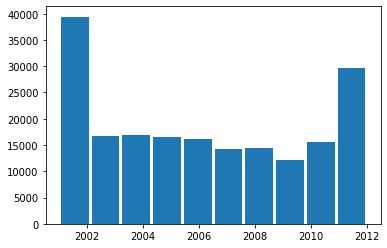

In [21]:
plt.hist(chicago.Year, rwidth=0.9)

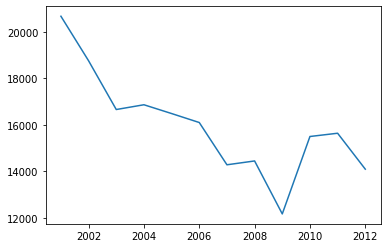

In [22]:
plt.plot(chicago.groupby('Year').ID.count())

In [23]:
print('Question: In general, does it look like crime decreases from 2002 - 2012?')
print('Answer: Correct')
print('\n')

print('Question: In general, does it look like crime increases from 2005 - 2008?')
print('Answer: Wrong')
print('\n')

print('Question: In general, does it look like crime increases from 2009 - 2011?')
print('Answer: Correct')
print('\n')

Question: In general, does it look like crime decreases from 2002 - 2012?
Answer: Correct


Question: In general, does it look like crime increases from 2005 - 2008?
Answer: Wrong


Question: In general, does it look like crime increases from 2009 - 2011?
Answer: Correct




### 6) Crimes for which more arrests were made are in the first half of the time period or the second half of the time period? 
 i)  First half (2001 to 2006)   
ii) Second half (2007 to 2012)

In [24]:
yearly_crimes = chicago[chicago['Arrest']==True].Year.value_counts()
print('Crimes Arrest made in First half  : ', yearly_crimes[0:6].sum())
print('Crimes Arrest made in Second half : ', yearly_crimes[6:13].sum())

Crimes Arrest made in First half  :  10588
Crimes Arrest made in Second half :  4948


**Observation:**  More Arrests were made in **first half** period.

### 7) For what proportion of motor vehicle thefts in 2001 was an arrest made? 
i) 0.06, ii) 0.08, iii) 0.10, iv) 0.12

In [25]:
Arrested_2001 = chicago[(chicago.Year==2001) & (chicago.Arrest==True)].ID.count()
Not_Arrested_2001 = chicago[(chicago.Year==2001) & (chicago.Arrest==False)].ID.count()
print('Proportion of motor vehicle thefts in 2001 was an arrest made is : ', round(Arrested_2001/Not_Arrested_2001, 2))

Proportion of motor vehicle thefts in 2001 was an arrest made is :  0.12


### 8) For what proportion of motor vehicle thefts in 2007 was an arrest made? 
(round your answer to 2 decimal places) 

In [26]:
Arrested_2007 = chicago[(chicago.Year==2007) & (chicago.Arrest==True)].ID.count()
Not_Arrested_2007 = chicago[(chicago.Year==2007) & (chicago.Arrest==False)].ID.count()
print('Proportion of motor vehicle thefts in 2007 was an arrest made is : ', round(Arrested_2007/Not_Arrested_2007, 2))

Proportion of motor vehicle thefts in 2007 was an arrest made is :  0.09


### 9) Which locations are the top five locations for motor vehicle thefts, excluding the "Other" category? 
Bank, 
Gas Station, 
Hotel/Motel, 
Street, 
Car Wash, 
Restaurant, 
Parking Lot/Garage (Non-Residential), 
Alley, 
Driveway (Residential), 
Vacant Lot/Land

In [ ]:
chicago.LocationDescription.value_counts().head(6)

**Observation:**
From the above observation, Top five locations except "Other" are:
1. 'STREET', 
2. 'PARKING LOT/GARAGE(NON.RESID.)', 
3. 'ALLEY', 
4. 'GAS STATION',
5. 'DRIVEWAY - RESIDENTIAL'

### 10) Create a subset of your data, only taking observations for which the theft happened in one of these five locations, and call this new data set "Top5". How many observations are in Top5?

In [27]:
# Creating a list with top 5 locations which have more motor vehicle thefts
top5_loc_list=['STREET','PARKING LOT/GARAGE(NON.RESID.)', 'ALLEY', 'GAS STATION', 'DRIVEWAY - RESIDENTIAL']
# Creating a data frame with these location values
Top5 = chicago[chicago.LocationDescription.isin(top5_loc_list)]
print('Total observations in Top5 data frame is : ', Top5.shape[0])

Total observations in Top5 data frame is :  177510


In [ ]:
# Alternative method:
chicago.LocationDescription.value_counts().head(6).sum()-4573

### 11) On which day of the week do the most motor vehicle thefts at gas stations happen?
Monday, 
Tuesday, 
Wednesday, 
Thursday, 
Friday, 
Saturday, 
Sunday

In [28]:
chicago[chicago.LocationDescription == 'GAS STATION'].Date.dt.weekday.value_counts()

5    338
6    336
4    332
3    282
0    280
2    273
1    270
Name: Date, dtype: int64

**Observation:**  
By observing above results, number 5 is having maximum vehicle theft.   
So vehicle theft is more on **Saturday**.

*Note:*  
0 - Monday  
1 - Tuesday  
2 - Wednessday  
3 - Thurday  
4 - Friday  
5 - Saturday  
6 - Sunday